In [15]:
import pandas as pd

In [16]:
raw_data = pd.read_csv("Moon Missions - Sheet1.csv")

raw_data.columns

Index(['Mission', 'Spacecraft', 'Launch Date', 'Carrier rocket', 'Operator',
       'Mission type', 'Outcome'],
      dtype='object')

In [17]:
# Select only the 'Mission', 'Launch Date', and 'Outcome' columns
cleaned_data = raw_data[['Mission', 'Launch Date', 'Operator', 'Outcome']]

cleaned_data['Mission'] = cleaned_data['Mission'].str.replace(r'\[\d+\]|[\*\n]', '', regex=True)

# Remove rows with NaN values in any of the selected columns
cleaned_data = cleaned_data.dropna(subset=['Mission', 'Launch Date', 'Operator', 'Outcome'])

/var/folders/2r/w0dl27wx2m71cjdzwlk0ys5r0000gn/T/ipykernel_7354/2908957366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Mission'] = cleaned_data['Mission'].str.replace(r'\[\d+\]|[\*\n]', '', regex=True)


In [18]:
cleaned_data.head()


,Mission,Launch Date,Operator,Outcome
0,Pioneer 0(Able I),17-Aug-58,USAF,Launch failure
2,Luna E-1 No.1,23-Sep-58,OKB-1,Launch failure
4,Pioneer 1(Able II),11-Oct-58,NASA,Launch failure
6,Luna E-1 No.2,11-Oct-58,OKB-1,Launch failure
8,Pioneer 2(Able III),08-Nov-58,NASA,Launch failure


In [19]:
# Write the cleaned data to a new CSV file
cleaned_data.to_csv('cleaned_data.csv', index=False)

/var/folders/2r/w0dl27wx2m71cjdzwlk0ys5r0000gn/T/ipykernel_7354/306811104.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleaned_data['Launch Date'] = pd.to_datetime(cleaned_data['Launch Date'], errors='coerce')


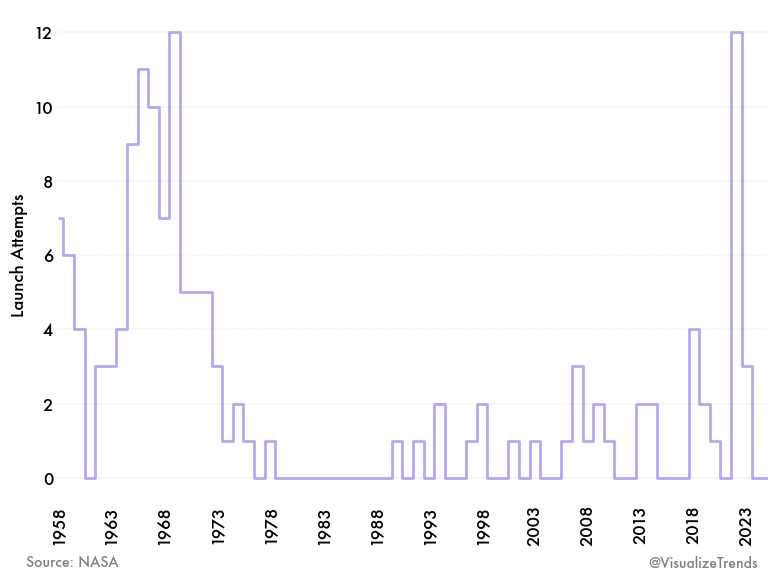

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Read the cleaned data
cleaned_data = pd.read_csv('cleaned_data.csv')

# Function to convert two-digit year to four-digit year
def convert_year(year):
    if year >= 58 and year <= 99:
        return 1900 + year
    elif year >= 0 and year <= 23:
        return 2000 + year
    return year

# Convert the 'Launch Date' column to a datetime object
cleaned_data['Launch Date'] = pd.to_datetime(cleaned_data['Launch Date'], errors='coerce')

# Drop rows with invalid dates
cleaned_data = cleaned_data.dropna(subset=['Launch Date'])

# Extract the two-digit year and convert to four-digit year
cleaned_data['Year'] = cleaned_data['Launch Date'].dt.year
cleaned_data['Year'] = cleaned_data['Year'].apply(lambda x: convert_year(x % 100))

# Filter out rows with a year less than 1958
cleaned_data = cleaned_data[cleaned_data['Year'] >= 1958]

# Group the data by 'Year' and count the number of launches
launch_counts = cleaned_data.groupby('Year').size().reset_index(name='Launches')

# Fill in missing years with zeros
all_years = pd.DataFrame({'Year': range(1958, 2026)})
launch_counts = all_years.merge(launch_counts, on='Year', how='left').fillna(0)

# Set the style to 'fivethirtyeight'

plt.style.use('fivethirtyeight')
# Create a figure with the specified background color
# Create a figure with the specified background color
fig = plt.figure(figsize=(8, 6), facecolor='#FFFFFF', edgecolor='#FFFFFF')

# Set the background color of the axes
ax = plt.gca()
ax.set_facecolor('#FFFFFF')

# Turn off the frame of the axes
for spine in ax.spines.values():
    spine.set_visible(False)

plt.grid(False)
# Set the background color of the axes


plt.step(launch_counts['Year'], launch_counts['Launches'].values, where='mid', color='#B29BF4', alpha=0.9, linewidth=2)


# Add horizontal lines with zorder=0
for y in range(0, int(launch_counts['Launches'].max()) + 1, 2):
    plt.axhline(y=y, color='black', linestyle='--', linewidth=0.2, zorder=0, alpha=0.3)


# plt.title("A Journey Through Space: Launches Over the Years", fontname='Futura', fontsize=22, color='black')
plt.ylabel('Launch Attempts', fontname='Futura', fontsize=12, color='black')



# Set x-axis limits and tick labels to display last two digits of the year
plt.xlim(1958, 2025)
plt.xticks(range(1958, 2025, 5), fontname='Futura', fontsize=12, color='black', rotation =90)
plt.yticks(fontname='Futura', fontsize=12, color='black')

# ... (rest of the code)

# Add source text at the bottom left
plt.text(1955, -launch_counts['Launches'].max() * 0.2, "Source: NASA", fontname='Futura', fontsize=10, color='grey')

# Add handle name at the bottom right
plt.text(2024, -launch_counts['Launches'].max() * 0.2, "@VisualizeTrends", fontname='Futura', fontsize=10, color='grey', ha='right')

# Adjust the plot to make room for the text
plt.subplots_adjust(bottom=0.1)

# Show the plot
plt.tight_layout()
plt.savefig('Moon Missions.png', bbox_inches='tight', facecolor=fig.get_facecolor(), dpi=300)



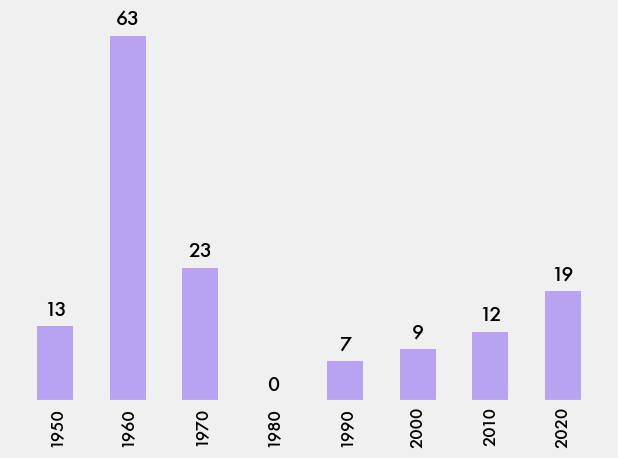

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the fivethirtyeight style
plt.style.use('fivethirtyeight')

# Create a DataFrame using the given data
data = {
    'Decade': [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020],
    'Launches': [13, 63, 23, 0, 7, 9, 12, 19]
}
df = pd.DataFrame(data)

# Plotting the vertical bar graph
bars = plt.bar(df['Decade'], df['Launches'], color='#B8A3F3', width=5) # Set color and bar width

# Annotating the bars with the number of launches
for bar, value in zip(bars, df['Launches']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, str(value), ha='center', va='bottom', fontname = 'Futura')

plt.grid(False) # Remove grid
plt.yticks([]) # Remove y-ticks
plt.xticks(fontname='Futura', fontsize=12, color='black', rotation =90)
plt.tight_layout() # Adjust layout
plt.savefig('Bars.png', bbox_inches='tight',  dpi=300)
